In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajaxlegrand","key":"baf5b2d32fc89c872a17f185d4649596"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir ~/.kaggle


In [0]:
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:22<00:00, 52.9MB/s]
100% 1.15G/1.15G [00:22<00:00, 54.7MB/s]


In [9]:
!unzip /content/chest-xray-pneumonia.zip

Archive:  /content/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [0]:
!unzip /content/chest_xray.zip

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras.layers import Activation , Dropout , Flatten , Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import random

In [0]:
train_normal = os.listdir('/content/chest_xray/train/NORMAL')
train_pneumonia = os.listdir('/content/chest_xray/train/PNEUMONIA')

val_normal = os.listdir('/content/chest_xray/val/NORMAL')
val_pneumonia = os.listdir('/content/chest_xray/val/PNEUMONIA')

test_normal = os.listdir('/content/chest_xray/test/NORMAL')
test_pneumonia = os.listdir('/content/chest_xray/test/PNEUMONIA')

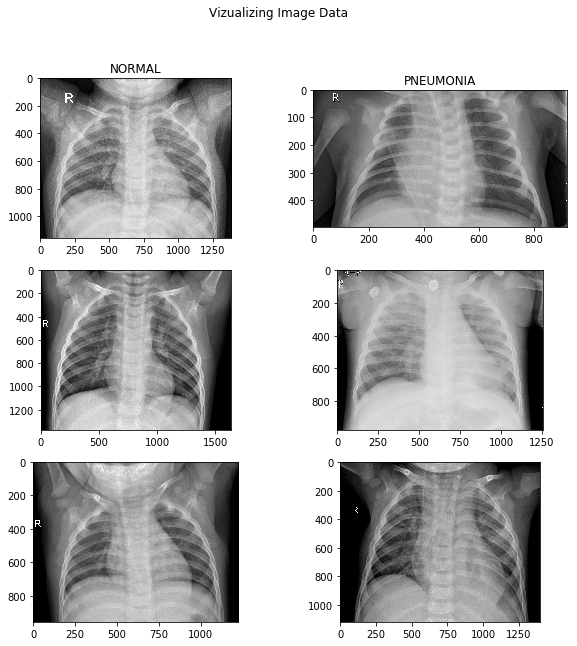

In [42]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Image Data')
ax[0 , 0].set_title('NORMAL')
ax[0 , 1].set_title('PNEUMONIA')

# print(ax.shape)
for i in range(0 , 3):
  img = load_img('/content/chest_xray/train/NORMAL/'+str(random.choice(train_normal)))
  ax[i , 0].imshow(img)

  img = load_img('/content/chest_xray/train/PNEUMONIA/'+str(random.choice(train_pneumonia)))
  ax[i , 1].imshow(img)
    
plt.show()

In [0]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

In [0]:
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'
test_data_dir = 'chest_xray/test'

In [47]:
train_samples = len(train_normal) + len(train_pneumonia) - 1
val_samples = len(val_normal) + len(val_pneumonia) - 1
print(train_samples , val_samples)

5217 17


In [0]:
EPOCHS = 20
batch_size = 16

In [62]:
if K.image_data_format() == 'channel_first':
  input_shape = (3 , IMG_WIDTH , IMG_HEIGHT)
else:
  input_shape = (IMG_WIDTH , IMG_HEIGHT , 3)
  
input_shape

(150, 150, 3)

In [0]:
model = Sequential([
    Conv2D(32 , (3 , 3) , input_shape = input_shape),
    Activation('relu'),
    MaxPooling2D(pool_size = (2 , 2)),
    
    Conv2D(32 , (3 , 3)),
    Activation('relu'),
    MaxPooling2D(pool_size = (2 , 2)),
    
    Conv2D(64 , (3 , 3)),
    Activation('relu'),
    MaxPooling2D(pool_size = (2 , 2)),
    
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(1),
    Activation('sigmoid')    
])

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_38 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_39 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [88]:
model.input

<tf.Tensor 'conv2d_20_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [89]:
model.output

<tf.Tensor 'activation_42/Sigmoid:0' shape=(?, 1) dtype=float32>

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [0]:
train_data_generator = ImageDataGenerator(rescale = 1. / 255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

In [0]:
test_data_generator = ImageDataGenerator(rescale = 1. / 255)

In [93]:
train_data_set = train_data_generator.flow_from_directory(train_data_dir,
                                                         target_size = (IMG_WIDTH , IMG_HEIGHT),
                                                         batch_size = batch_size,
                                                         class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [94]:
val_data_set = test_data_generator.flow_from_directory(val_data_dir,
                                                         target_size = (IMG_WIDTH , IMG_HEIGHT),
                                                         batch_size = batch_size,
                                                         class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [95]:
test_data_set = train_data_generator.flow_from_directory(test_data_dir,
                                                         target_size = (IMG_WIDTH , IMG_HEIGHT),
                                                         batch_size = batch_size,
                                                         class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [96]:
history = model.fit_generator(train_data_set,
                       steps_per_epoch=train_samples // batch_size,
                       epochs = EPOCHS,
                       validation_data = val_data_set,
                       validation_steps = val_samples // batch_size)

Epoch 1/20
326/326 [==============================] - 92s 281ms/step - loss: 0.3953 - acc: 0.8154 - val_loss: 0.4943 - val_acc: 0.8125
Epoch 2/20
326/326 [==============================] - 92s 282ms/step - loss: 0.2856 - acc: 0.8834 - val_loss: 0.6482 - val_acc: 0.8125
Epoch 3/20
326/326 [==============================] - 92s 284ms/step - loss: 0.2478 - acc: 0.8997 - val_loss: 1.5249 - val_acc: 0.6250
Epoch 4/20
326/326 [==============================] - 93s 285ms/step - loss: 0.2408 - acc: 0.9053 - val_loss: 0.6651 - val_acc: 0.6875
Epoch 5/20
326/326 [==============================] - 93s 285ms/step - loss: 0.2161 - acc: 0.9222 - val_loss: 0.4040 - val_acc: 0.7500
Epoch 6/20
326/326 [==============================] - 92s 284ms/step - loss: 0.2088 - acc: 0.9233 - val_loss: 0.7041 - val_acc: 0.7500
Epoch 7/20
326/326 [==============================] - 93s 284ms/step - loss: 0.1981 - acc: 0.9302 - val_loss: 0.8604 - val_acc: 0.6250
Epoch 8/20
326/326 [==============================] - 9

In [97]:
scores = model.evaluate_generator(test_data_set)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100))


acc: 89.58%


In [118]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = '/content/data-original.jpeg'
image1 = image.load_img(str(img1) , target_size=[150 , 150])
img_tensor = image.img_to_array(image1)
img_tensor = np.expand_dims(img_tensor , axis=0)
img_tensor /= 255.

print(img_tensor.shape)
result_batch = model.predict(img_tensor)
print(result_batch[0][0])

(1, 150, 150, 3)
0.9999813


In [0]:
model.save_weights('pneumonia_weights.h5')

In [0]:
model.save('pneumonia_model.h5')